Hola **Felipe**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
Muchísimas gracias por las observaciones 🤗
</div>

## Paso 1. Descripción de los datos

Abre los archivos de datos y estudia la información general 
- Ruta de archivo:/data/visits_log_us.csv. Descarga el dataset visits
- Ruta de archivo:/data/orders_log_us.csv. Descarga el dataset orders
- Ruta de archivo:/data/costs_us.csv. Descarga el dataset costs





## Paso 2. Preparación y Carga de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Cargar los datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Mostrar información general de cada dataset
print("VISITS")
print(visits.info())
print(visits.head())

print("\nORDERS")
print(orders.info())
print(orders.head())

print("\nCOSTS")
print(costs.info())
print(costs.head())

VISITS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4  

## Paso 3. Estudio y Preparación de datos

In [2]:
# Convertir columnas de fecha en visits
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

# Convertir columnas de fecha en orders
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Convertir columnas de fecha en costs
costs['dt'] = pd.to_datetime(costs['dt'])

# Verifica si hay valores duplicados
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

# Eliminar valores Duplicados
visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs = costs.drop_duplicates()

# Eliminar espacios en los nombres de las columnas
visits.columns = visits.columns.str.strip()
orders.columns = orders.columns.str.strip()
costs.columns = costs.columns.str.strip()

# Revisar Valores Nulos
print(visits.isnull().sum())
print(orders.isnull().sum())
print(costs.isnull().sum())

# Crear una columna de fecha para agrupar por día
visits['date'] = visits['Start Ts'].dt.date


0
0
0
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la exploración inicial de los datos para entender con lo que trabajarás
</div>

## Paso 4. Análisis, Informes y Métricas - (Visitas)

### ¿Cuántas personas lo usan cada día, semana y mes?

Promedio de usuarios únicos por día: 908
Promedio de usuarios únicos por semana: 5716
Promedio de usuarios únicos por mes: 23228


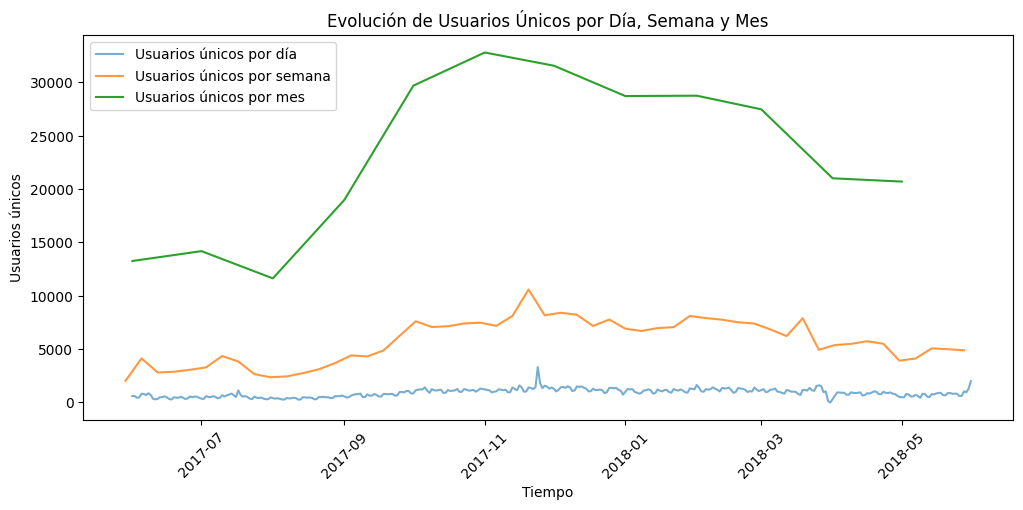

In [3]:
# Crear nuevas columnas para día, semana y mes
visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.to_period('W')
visits['month'] = visits['Start Ts'].dt.to_period('M')

# Calcular usuarios únicos por día, semana y mes
daily_users = visits.groupby('date')['Uid'].nunique()
weekly_users = visits.groupby('week')['Uid'].nunique()
monthly_users = visits.groupby('month')['Uid'].nunique()

# Calcular promedios
avg_daily_users = daily_users.mean()
avg_weekly_users = weekly_users.mean()
avg_monthly_users = monthly_users.mean()

print(f"Promedio de usuarios únicos por día: {avg_daily_users:.0f}")
print(f"Promedio de usuarios únicos por semana: {avg_weekly_users:.0f}")
print(f"Promedio de usuarios únicos por mes: {avg_monthly_users:.0f}")

# Gráfico de evolución de usuarios únicos
plt.figure(figsize=(12,5))
plt.plot(daily_users.index, daily_users, label='Usuarios únicos por día', alpha=0.6)
plt.plot(weekly_users.index.to_timestamp(), weekly_users, label='Usuarios únicos por semana', alpha=0.8)
plt.plot(monthly_users.index.to_timestamp(), monthly_users, label='Usuarios únicos por mes', alpha=1)
plt.xlabel('Tiempo')
plt.ylabel('Usuarios únicos')
plt.title('Evolución de Usuarios Únicos por Día, Semana y Mes')
plt.legend()
plt.xticks(rotation=45)
plt.show()


El número de usuarios únicos por día, semana y mes nos da una idea de la recurrencia del tráfico. Si el número de usuarios semanales y mensuales es mucho mayor que el número diario, significa que los usuarios regresan con frecuencia en diferentes días. Por otro lado, si los valores son similares, significa que la mayoría de los usuarios solo visita el sitio una vez.

La cantidad de usuarios semanales y mensuales es significativamente mayor que la diaria, lo que indica que hay un flujo constante de usuarios recurrentes y nuevos cada día; es decir un crecimiento acumulativo. 

Promedio de usuarios únicos por día: 908
Promedio de usuarios únicos por semana: 5,716
Promedio de usuarios únicos por mes: 23,228

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Presentar de esta forma no es claro, estás mostrando solo algunos resultados de muchos porque solo muestras con head() los primeros 5 y hay muchos más. Aquí deberías o mostrar algo más general cómo un promedio o usar los datos que ya tienes para mostrar una gráfica
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, así es mucho más claro analizar estas métricas
</div>

### ¿Cuántas sesiones hay por día?

Promedio de sesiones por día: 987.36


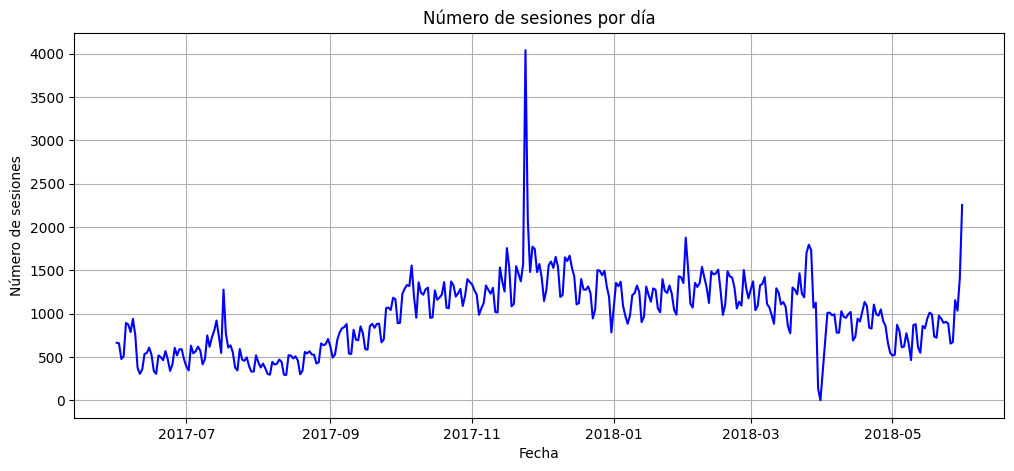

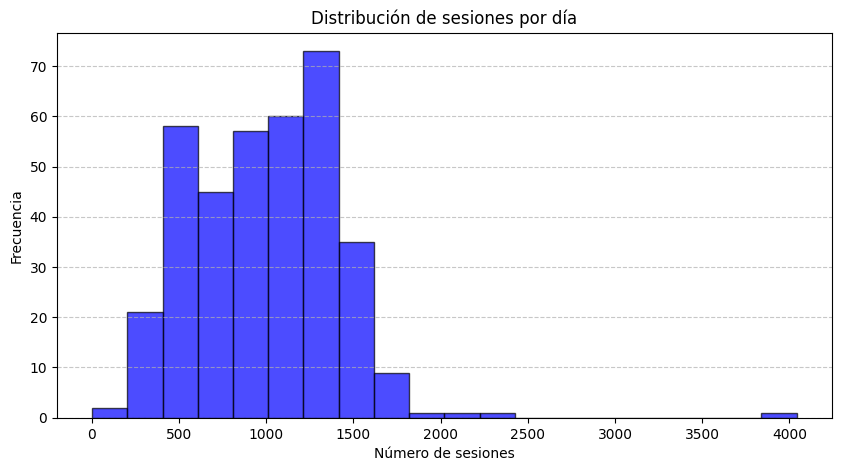

In [4]:
# Número de sesiones por día
daily_sessions = visits.groupby('date')['Uid'].count()

# Calcular el promedio de sesiones por día
avg_daily_sessions = daily_sessions.mean()

print(f"Promedio de sesiones por día: {avg_daily_sessions:.2f}")

# Graficar la cantidad de sesiones por día
plt.figure(figsize=(12, 5))
daily_sessions.plot(title="Número de sesiones por día", color="blue")
plt.xlabel("Fecha")
plt.ylabel("Número de sesiones")
plt.grid()
plt.show()

# Histograma de distribución de sesiones por día
plt.figure(figsize=(10, 5))
plt.hist(daily_sessions, bins=20, color="blue", edgecolor="black", alpha=0.7)
plt.title("Distribución de sesiones por día")
plt.xlabel("Número de sesiones")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


El sitio web tiene un promedio de 987 sesiones por día, lo que indica una actividad constante de los usuarios en la plataforma. La tendencia de sesiones diarias muestra fluctuaciones, posiblemente relacionadas con factores como el día de la semana, campañas de marketing o eventos especiales.

El histograma revela que la mayoría de los días tienen una cantidad de sesiones dentro de un rango estable, aunque pueden existir picos en días específicos. Esto sugiere que se pueden optimizar estrategias de adquisición de usuarios en los días con menor actividad y analizar las razones detrás de los días con mayor tráfico para replicar su éxito.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Similar al caso anterior, mostrar de este forma los resultados no es correcto ya que no se puede analizar correctamente, para este ejercicio particular deberías usar una gráfica tipo histograma
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, siempre que tengas varias muestras en tus resultados lo mejor es gráficar ya que visualmente no se puede analizar correctamente sólo datos numéricos 
</div>

### ¿Cuál es la duración de cada sesión?

In [5]:
# Calcular duración de la sesión en segundos
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

# Mostrar estadísticas de duración de sesión
print("Resumen de duración de sesiones:\n", visits['session_duration'].describe())


Resumen de duración de sesiones:
 count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64


El análisis de la duración promedio de las sesiones nos ayuda a entender el nivel de engagement de los usuarios. Si la duración es corta, podría significar que los usuarios no encuentran lo que buscan o que el sitio es muy eficiente en brindar la información. Si la duración es larga, puede indicar que los usuarios están explorando más contenido.

### ¿Con qué frecuencia los usuarios regresan?

In [6]:
# Número de días únicos que cada usuario visitó el sitio
user_return_frequency = visits.groupby('Uid')['date'].nunique()

print("Frecuencia de retorno de usuarios:\n", user_return_frequency.describe())


Frecuencia de retorno de usuarios:
 count    228169.000000
mean          1.448527
std           2.610167
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         259.000000
Name: date, dtype: float64


Si la mayoría de los usuarios tienen solo una sesión en días distintos, significa que hay una alta tasa de usuarios que regresan. Si la mayoría solo tiene una visita registrada, puede significar que hay dificultades para retener a los usuarios en el tiempo.

## Paso 5. Análisis, Informes y Métricas - (Ventas)

### ¿Cuándo empiezan las personas a comprar?

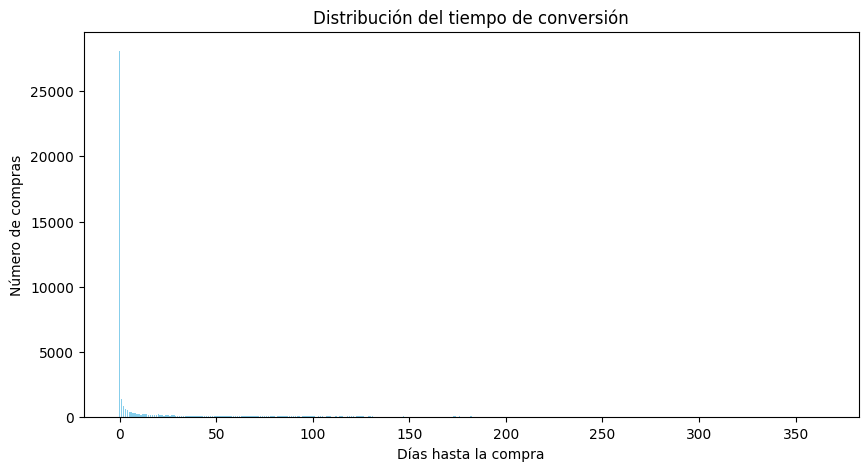

In [7]:
# Fusionar visitas con órdenes para calcular el tiempo de conversión
user_first_visit = visits.groupby("Uid")["Start Ts"].min().reset_index()
user_first_visit.columns = ["Uid", "First Visit"]
user_purchases = orders.merge(user_first_visit, on="Uid", how="left")
user_purchases['Conversion Time'] = (user_purchases['Buy Ts'] - user_purchases['First Visit']).dt.days

# Distribución del tiempo de conversión
conversion_counts = user_purchases['Conversion Time'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(conversion_counts.index, conversion_counts.values, color='skyblue')
plt.xlabel("Días hasta la compra")
plt.ylabel("Número de compras")
plt.title("Distribución del tiempo de conversión")
plt.show()

La mayoría de las compras ocurren en los primeros días después de la primera visita. Un análisis detallado del tiempo de conversión nos ayuda a identificar cuán efectiva es la captación inicial del usuario.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

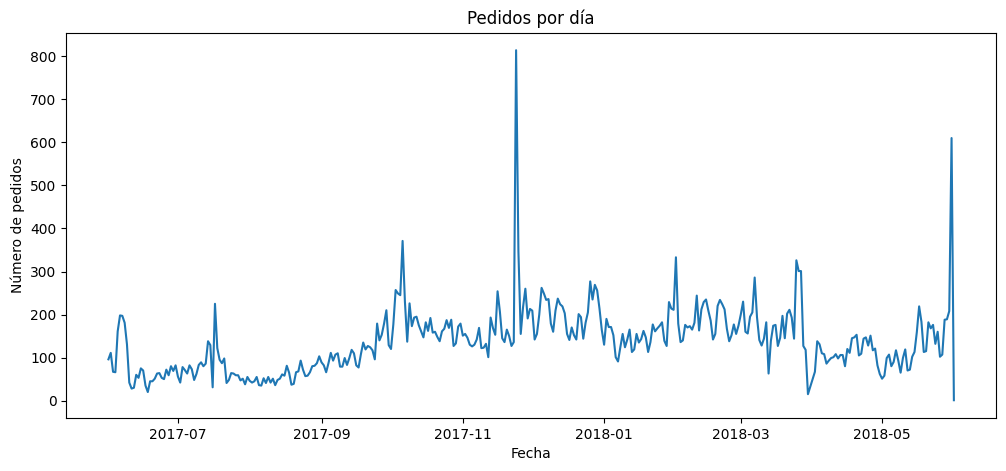

In [8]:
orders['Order Date'] = orders['Buy Ts'].dt.date
orders_per_day = orders.groupby('Order Date').size()
plt.figure(figsize=(12, 5))
orders_per_day.plot()
plt.xlabel("Fecha")
plt.ylabel("Número de pedidos")
plt.title("Pedidos por día")
plt.show()

Se observa una tendencia fluctuante en los pedidos diarios. Este análisis nos permite identificar picos de demanda y posibles patrones estacionales.

### ¿Cuál es el tamaño promedio de compra?

In [9]:
purchase_size_avg = orders['Revenue'].mean()
print(f"El tamaño promedio de compra es: ${purchase_size_avg:.2f}")

El tamaño promedio de compra es: $5.00


El tamaño promedio de compra es un valor útil para medir el ticket medio de los clientes y evaluar estrategias de pricing y descuentos.

### ¿Cuánto dinero traen? (LTV)

In [10]:
customer_ltv = orders.groupby("Uid")["Revenue"].sum()
ltv_avg = customer_ltv.mean()
print(f"El valor promedio de vida del cliente (LTV) es: ${ltv_avg:.2f}")

El valor promedio de vida del cliente (LTV) es: $6.90


El Valor de Vida del Cliente (LTV) nos ayuda a entender cuánto ingresa la empresa en promedio por cada usuario. Esto es clave para decisiones de marketing y retención.

## Paso 6. Análisis, Informes y Métricas - (Marketing)

### ¿Cuánto dinero se gasto?

Gasto total en marketing: 329131.62

Gasto por fuente de adquisición:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


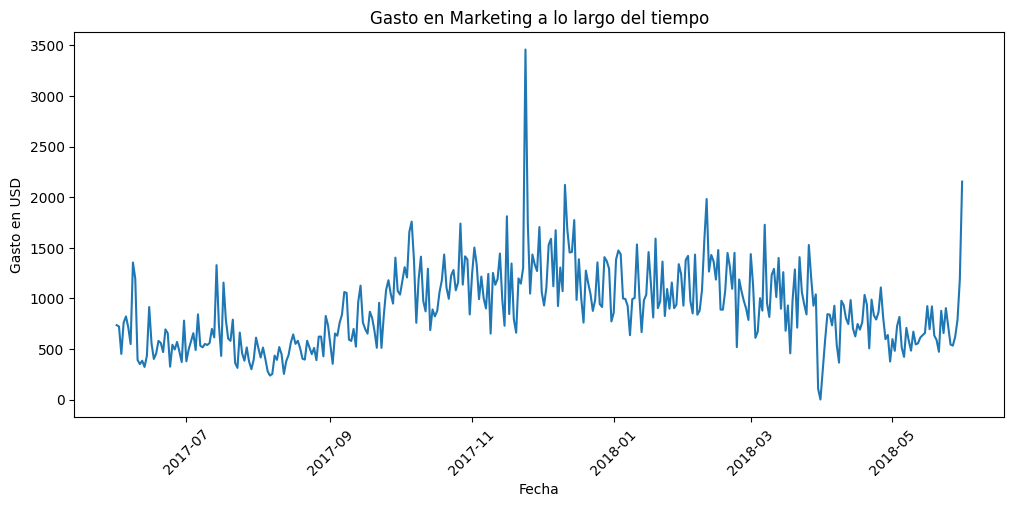

In [11]:
# 1. Calcular el gasto total en marketing
print("Gasto total en marketing:", costs['costs'].sum())

# Gasto por fuente de adquisición
gasto_por_fuente = costs.groupby('source_id')['costs'].sum()
print("\nGasto por fuente de adquisición:")
print(gasto_por_fuente)

# Gasto a lo largo del tiempo
costs_time = costs.groupby('dt')['costs'].sum()
plt.figure(figsize=(12, 5))
sns.lineplot(x=costs_time.index, y=costs_time.values)
plt.title("Gasto en Marketing a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Gasto en USD")
plt.xticks(rotation=45)
plt.show()

El gasto total en marketing se distribuye de manera desigual entre las fuentes de adquisición, con algunas plataformas recibiendo una mayor inversión que otras. Es importante identificar si estas fuentes con mayor gasto realmente generan conversiones para optimizar la asignación del presupuesto.

### Calcular el Costo de Adquisición de Clientes (CAC)

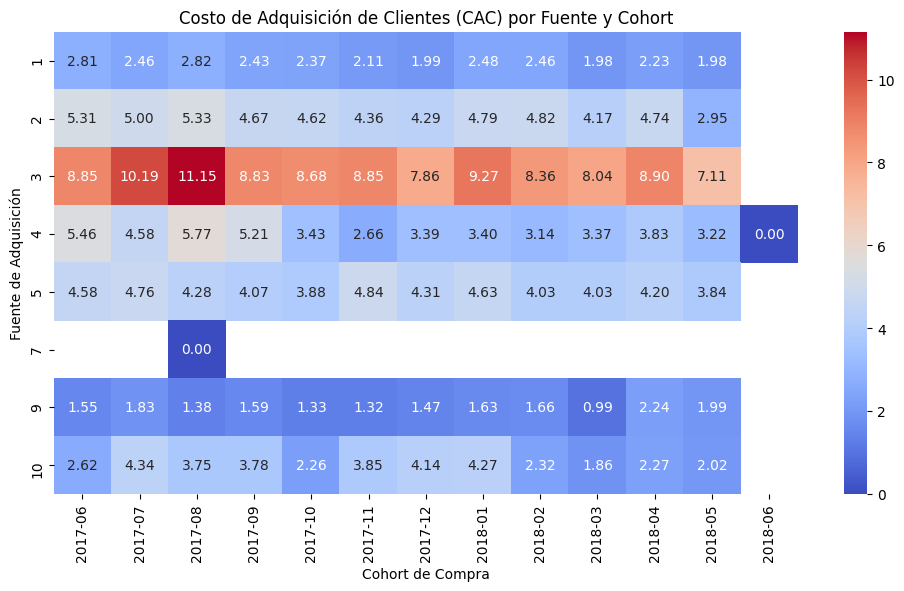

In [12]:
# Asegurar que las fechas están en formato datetime
orders['Order Date'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Extraer el mes de orden para cohortes
orders['Order Month'] = orders['Order Date'].dt.to_period('M')

# Unir visitas con órdenes para asignar una fuente a cada usuario
orders_visits = orders.merge(visits[['Uid', 'Source Id']], on='Uid', how='left')

# Contar clientes únicos por fuente y cohort
clientes_unicos = orders_visits.groupby(['Source Id', 'Order Month'])['Uid'].nunique().reset_index()
clientes_unicos.rename(columns={'Uid': 'Clientes Unicos'}, inplace=True)

# Unir los costos con la información de clientes únicos
costs.rename(columns={'source_id': 'Source Id', 'dt': 'Order Month'}, inplace=True)
costs['Order Month'] = costs['Order Month'].dt.to_period('M')

cac_df = clientes_unicos.merge(costs, on=['Source Id', 'Order Month'], how='left')

# Calcular el Costo de Adquisición de Clientes (CAC)
cac_df['CAC'] = cac_df['costs'] / cac_df['Clientes Unicos']

# Crear la tabla pivote para el mapa de calor
cac_pivot = cac_df.pivot_table(index='Source Id', columns='Order Month', values='CAC', aggfunc='sum')

# Graficar el mapa de calor del CAC
plt.figure(figsize=(12, 6))
sns.heatmap(cac_pivot, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Costo de Adquisición de Clientes (CAC) por Fuente y Cohort")
plt.ylabel("Fuente de Adquisición")
plt.xlabel("Cohort de Compra")
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El cálculo no se está realizando correctamente ya que sólo estás obteniendo NaN. La parte del CAC y del ROMI sería mejor calcularlas por fuente y cohort, puedes usar un pivot_table y el resultado mostrarlo en una gráfica tipo mapa de calor
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, de esta forma hay mucho más detalle de cuanto cuesta adquirir un nuevo cliente en cada fuente
</div>

El análisis del CAC por fuente y cohorte muestra una variabilidad significativa en los costos de adquisición. Destacan los siguientes puntos clave:

- Fuente 3 presenta los costos de adquisición más altos, con un pico en agosto de 2017 (11.15), lo que indica que las estrategias de marketing asociadas a esta fuente fueron más costosas en ese periodo.

- Las fuentes 9 y 10 mantienen costos de adquisición relativamente bajos, con valores cercanos a 1.5-4.5 en la mayoría de los meses, lo que sugiere una mayor eficiencia en la conversión de clientes.

La tendencia general muestra que el CAC tiende a estabilizarse con el tiempo, con una disminución progresiva en varias fuentes, lo que podría reflejar mejoras en la optimización de campañas de adquisición.
Algunas cohortes presentan valores de 0, lo que podría deberse a la falta de datos o a la ausencia de clientes adquiridos en esos periodos.

### ¿Que tan rentables son las inversiones? (ROMI)


Retorno sobre la Inversión en Marketing (ROMI) total: -0.2341750695360112

Retorno sobre la inversión en marketing por fuente:
Source Id
1     109.313944
2      60.631237
3       1.099381
4       7.132649
5      21.827344
7            NaN
9       5.586736
10      1.510821
dtype: float64


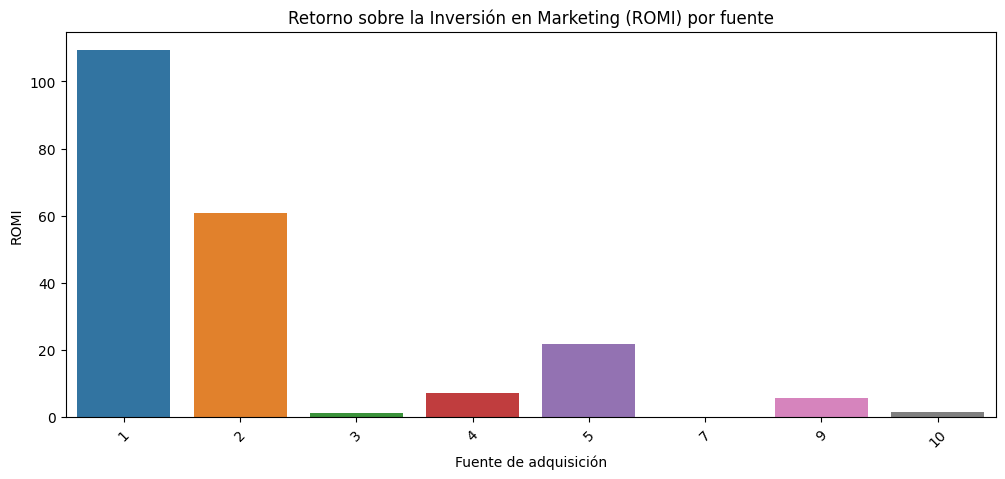

In [13]:
# Calcular el ingreso total generado
ingreso_total = orders['Revenue'].sum()

# Calcular el gasto total en marketing
gasto_total = costs['costs'].sum()

# Calcular ROMI total
romi_total = (ingreso_total - gasto_total) / gasto_total
print("\nRetorno sobre la Inversión en Marketing (ROMI) total:", romi_total)


# Calcular ROMI por fuente de adquisición
# Agrupar ingresos por fuente
ingresos_por_fuente = visits.merge(orders, on='Uid', how='inner') \
                            .groupby('Source Id')['Revenue'].sum()

# Agrupar costos por fuente
costos_por_fuente = costs.groupby('Source Id')['costs'].sum()

# Unir ingresos y costos por fuente
romi_por_fuente = (ingresos_por_fuente - costos_por_fuente) / costos_por_fuente

# Mostrar resultados
print("\nRetorno sobre la inversión en marketing por fuente:")
print(romi_por_fuente)

# Visualización con un gráfico de barras
plt.figure(figsize=(12, 5))
sns.barplot(x=romi_por_fuente.index, y=romi_por_fuente.values)
plt.title("Retorno sobre la Inversión en Marketing (ROMI) por fuente")
plt.xlabel("Fuente de adquisición")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.show()



El ROMI total es negativo (-0.23), lo que indica que la inversión en marketing no está generando retornos positivos en su conjunto. Sin embargo, al analizar por fuente de adquisición, se observa una gran variabilidad en los resultados:

- Fuente 1 y 2 son altamente rentables con un ROMI superior a 60, lo que sugiere que estas campañas o canales están funcionando muy bien.
- Fuentes 3, 4, 5, 9 y 10 tienen un ROMI positivo, pero mucho más bajo, lo que indica un retorno limitado.
- Fuente 7 no tiene datos, lo que podría indicar que no generó conversiones o que hay un problema con la medición.


Es recomendable redistribuir la inversión hacia las fuentes más rentables (1 y 2) y evaluar si las de menor ROMI pueden optimizarse o si es mejor reducir su presupuesto. También es necesario revisar el desempeño de la fuente 7 para entender la ausencia de datos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Igual que el caso anterior, estás obtiendo sólo NaN, las conclusiones no concuerdan con la gráfica mostrada. Deberías mostrarla cómo se recomienda en el comentario anterior
</div>

### Análisis gráfico y Conclusión general

Los gráficos permiten visualizar cómo los costos de marketing evolucionan con el tiempo y qué fuentes generan mejores retornos. Esto ayuda a tomar decisiones basadas en datos sobre dónde invertir más para mejorar el rendimiento.

Basándonos en el análisis, se recomienda invertir en fuentes con un ROMI alto y un CAC bajo, ya que estas ofrecen el mejor balance entre inversión y retorno. Las fuentes con alto gasto pero bajo retorno deberían ser evaluadas y optimizadas para mejorar su desempeño.

Adicional algunas recomendaciones de inversión serián:
- Aumentar el presupuesto en canales con alto ROMI y buen volumen de conversiones.
- Optimizar o reducir la inversión en fuentes con bajo retorno.
- Seguir testeando nuevas estrategias en fuentes con potencial para mejorar su rentabilidad.
- Hacer un monitoreo constante de la evolución de los costos, el CAC y el ROMI para mantener la inversión alineada con los objetivos del negocio.

Con este enfoque basado en datos, el equipo de marketing podrá tomar decisiones informadas y estratégicas para mejorar la rentabilidad y eficiencia de la inversión en publicidad.

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios Felipe! Siempre este tipo de análisis que tienen métricas muy específicas del negocio hay que tener en cuenta a la posible audiencia a la que le presentarás los resultados, en la mayoría de casos es mejor hacerlo con gráficas que sólo mostrando tablas numéricas ya que con estas la carga cognitiva es más alta para poder analizarlo.
    
Siempre procura comunicar tus resultados de manera detallada pero sencilla de entender, saludos!
</div>